In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..', '..')))

In [ ]:
%ls

 Volume in drive C is Acer
 Volume Serial Number is 70D2-9BA1

 Directory of c:\Users\melan\shared-folder\Thesis\SSL-for-Quantum-Cirucits-Generation\QCCL\notebooks

20/10/2024  13:17    <DIR>          .
28/09/2024  21:20    <DIR>          ..
24/09/2024  19:19         5,736,098 best_model.pth
24/09/2024  19:18               787 hyperparam_tuning_results_with_configs.yaml
11/10/2024  10:46           132,935 training.ipynb
24/09/2024  19:19            24,818 training_best_history.png
24/09/2024  18:59           204,856 training_byol big embedding.ipynb
14/10/2024  12:11           247,018 training_byol.ipynb
19/09/2024  16:50           248,587 training_norms_visual.ipynb
01/10/2024  07:38           441,652 training-visual.ipynb
29/10/2024  16:45           458,870 transforms_debugging.ipynb
               9 File(s)      7,495,621 bytes
               2 Dir(s)  82,925,608,960 bytes free


In [3]:
from qiskit import QuantumCircuit
from Data.QuantumCircuitGraph import QuantumCircuitGraph


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\melan\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\melan\AppData\Local\Programs\Python\Python312\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\melan\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\kernelapp.py", 

In [4]:
# Settings

GATE_TYPE_MAP = {
    'cx': 0, 
    'h': 1, 
    'x': 2,
    'z': 3,
    't': 4
    # Add here all possible gate types
} # map gate type to index in one-hot encoding
# add id always in last position
GATE_TYPE_MAP['id'] = len(GATE_TYPE_MAP)


QuantumCircuitGraph.set_gate_type_map(GATE_TYPE_MAP)
QuantumCircuitGraph.set_include_params(False)
QuantumCircuitGraph.set_include_identity_gates(False)
QuantumCircuitGraph.set_differentiate_cx(True)


print("Modified GATE_TYPE_MAP:", QuantumCircuitGraph.GATE_TYPE_MAP)
print("Modified include_params:", QuantumCircuitGraph.include_params)
print("Modified include_identity_gates:", QuantumCircuitGraph.include_identity_gates)
print("Modified differentiate_cx:", QuantumCircuitGraph.differentiate_cx)

Modified GATE_TYPE_MAP: {'cx': 0, 'h': 1, 'x': 2, 'z': 3, 't': 4, 'id': 5}
Modified include_params: False
Modified include_identity_gates: False
Modified differentiate_cx: True


### Test AddIdentityGatesTransformation

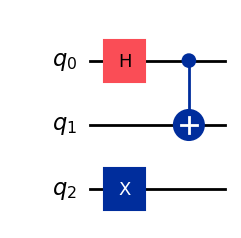

In [5]:
# Create a simple quantum circuit
num_qubits = 3
qc = QuantumCircuit(num_qubits)
qc.h(0)
qc.cx(0, 1)
qc.x(2)

# Visualize the initial quantum circuit
qc.draw('mpl')

In [6]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

In [7]:
from QCCL.transformations import AddIdentityGatesTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = AddIdentityGatesTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit


Transformed Circuit:


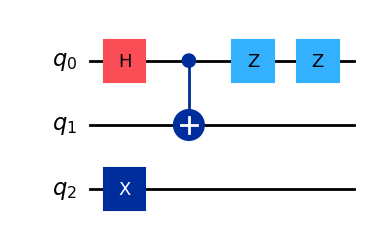

In [8]:
# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test RemoveIdentityGatesTransformation

In [9]:
from QCCL.transformations import RemoveIdentityGatesTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
reverse_transformation = RemoveIdentityGatesTransformation(transformed_qcg)

# Apply the transformation
transformed_qcg = reverse_transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

Pattern subgraphs: [(None, <networkx.classes.digraph.DiGraph object at 0x00000192CABE37D0>), (None, <networkx.classes.digraph.DiGraph object at 0x00000192E2F7EC60>), (None, <networkx.classes.digraph.DiGraph object at 0x00000192E3079F10>), (None, <networkx.classes.digraph.DiGraph object at 0x00000192E307B620>), (None, <networkx.classes.digraph.DiGraph object at 0x00000192E30A6D50>)]
Matching key and subgraph(dict): None, {'z_0_3': 'z_0_0', 'z_0_4': 'z_0_1'}
Matching subgraphs: DiGraph with 2 nodes and 1 edges
Matching key: None
Current operations: [(Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 0),), ()), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1)), ()), (Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 2),), ()), (Instruction(name='z', num_qubits=1, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q')


Transformed Circuit:


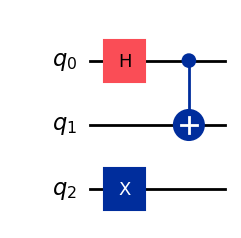

In [10]:
# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test SwapControlTargetTransformation


1st PATTERN: CNOT -> CNOT -> H, H, CNOT, H, H

Original Circuit:


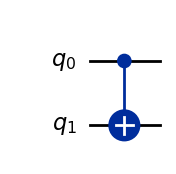

In [11]:
qc = QuantumCircuit(2)
qc.cx(0, 1)  # Add CNOT gate

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

In [12]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

In [13]:
from QCCL.transformations import SwapControlTargetTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = SwapControlTargetTransformation(qcg)

# Apply the transformation

transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit


Pattern subgraph: [('cx', <networkx.classes.digraph.DiGraph object at 0x00000192E30FC980>), ('h-h-cx-h-h', <networkx.classes.digraph.DiGraph object at 0x00000192E30FDA00>), ('h-h-cx', <networkx.classes.digraph.DiGraph object at 0x00000192E30EA810>), ('cx-h-h', <networkx.classes.digraph.DiGraph object at 0x00000192E30DB6B0>), ('h-cx-h', <networkx.classes.digraph.DiGraph object at 0x00000192E301B740>)]
Pattern subgraphs: [('h-cx-h', <networkx.classes.digraph.DiGraph object at 0x00000192E301B740>), ('h-h-cx', <networkx.classes.digraph.DiGraph object at 0x00000192E30EA810>), ('h-h-cx-h-h', <networkx.classes.digraph.DiGraph object at 0x00000192E30FDA00>), ('cx', <networkx.classes.digraph.DiGraph object at 0x00000192E30FC980>), ('cx-h-h', <networkx.classes.digraph.DiGraph object at 0x00000192E30DB6B0>)]
Matching key and subgraph(dict): cx, {'cx_0_control_0': 'cx_0_control_0', 'cx_1_target_0': 'cx_1_target_0'}
Matching subgraphs: DiGraph with 2 nodes and 2 edges
Matching key: cx
Graph nodes: 


Transformed Circuit:


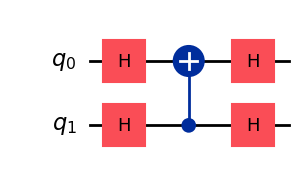

In [14]:

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2nd PATTERN: CNOT, H, H -> H, H, CNOT

Original Circuit:


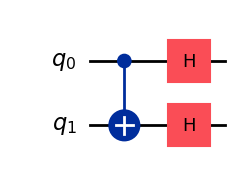

In [ ]:
qc = QuantumCircuit(2)
qc.cx(0, 1)  # Add CNOT gate
qc.h(0)
qc.h(1)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

In [16]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

In [17]:
from QCCL.transformations import SwapControlTargetTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = SwapControlTargetTransformation(qcg)

# Apply the transformation

transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

Pattern subgraph: [('cx', <networkx.classes.digraph.DiGraph object at 0x00000192E32BA570>), ('h-h-cx-h-h', <networkx.classes.digraph.DiGraph object at 0x00000192CAD59520>), ('h-h-cx', <networkx.classes.digraph.DiGraph object at 0x00000192E30DBE00>), ('cx-h-h', <networkx.classes.digraph.DiGraph object at 0x00000192E31EF6E0>), ('h-cx-h', <networkx.classes.digraph.DiGraph object at 0x00000192E309D850>)]
Pattern subgraphs: [('cx-h-h', <networkx.classes.digraph.DiGraph object at 0x00000192E31EF6E0>), ('h-cx-h', <networkx.classes.digraph.DiGraph object at 0x00000192E309D850>), ('cx', <networkx.classes.digraph.DiGraph object at 0x00000192E32BA570>), ('h-h-cx-h-h', <networkx.classes.digraph.DiGraph object at 0x00000192CAD59520>), ('h-h-cx', <networkx.classes.digraph.DiGraph object at 0x00000192E30DBE00>)]
Matching key and subgraph(dict): cx-h-h, {'cx_0_control_0': 'cx_0_control_0', 'cx_1_target_0': 'cx_1_target_0', 'h_0_1': 'h_0_1', 'h_1_2': 'h_1_2'}
Matching subgraphs: DiGraph with 4 nodes an


Transformed Circuit:


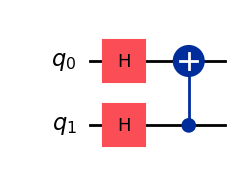

In [ ]:
# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2nd PATTERN: H, CNOT, H -> H, CNOT, H

Original Circuit:


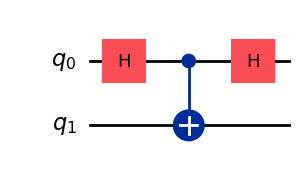

In [19]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)  # Add CNOT gate
qc.h(0)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraph: [('cx', <networkx.classes.digraph.DiGraph object at 0x00000192E31EC590>), ('h-h-cx-h-h', <networkx.classes.digraph.DiGraph object at 0x00000192E30A7620>), ('h-h-cx', <networkx.classes.digraph.DiGraph object at 0x00000192E325EC60>), ('cx-h-h', <networkx.classes.digraph.DiGraph object at 0x00000192E30FDA00>), ('h-cx-h', <networkx.classes.digraph.DiGraph object at 0x00000192E30EB860>)]
Pattern subgraphs: [('cx', <networkx.classes.digraph.DiGraph object at 0x00000192E31EC590>), ('h-cx-h', <networkx.classes.digraph.DiGraph object at 0x00000192E30EB860>), ('h-h-cx-h-h', <networkx.classes.digraph.DiGraph object at 0x00000192E30A7620>), ('h-h-cx', <networkx.classes.digraph.DiGraph object at 0x00000192E325EC60>), ('cx-h-h', <networkx.classes.digraph.DiGraph object at 0x00000192E30FDA00>)]
Matching key and subgraph(dict): cx, {'cx_0_control_1': 'cx_0_control_0', 'cx_1_target_1': 'cx_1_target_0'}
Matching subgraphs: DiGraph with 2 nodes and 2 edges
Matching key: cx
Graph nodes: 

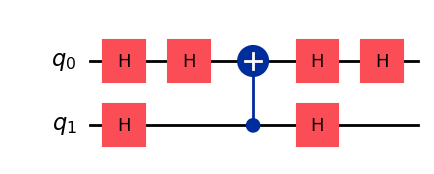

In [20]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = SwapControlTargetTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test CNOTDecompositionTransformation

1st PATTERN: CNOT -> CNOT, CNOT, CNOT, CNOT

Original Circuit:


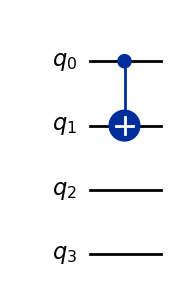

In [21]:
qc = QuantumCircuit(4)
qc.cx(0, 1)  # Add CNOT gate

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('c-t-c-t', <networkx.classes.digraph.DiGraph object at 0x00000192E2F2D2B0>), ('cx', <networkx.classes.digraph.DiGraph object at 0x00000192E31EC590>), ('t-c-t-c', <networkx.classes.digraph.DiGraph object at 0x00000192E309E0C0>)]
Matching key and subgraph(dict): cx, {'cx_0_control_0': 'cx_0_control_0', 'cx_1_target_0': 'cx_1_target_0'}
Matching subgraphs: DiGraph with 2 nodes and 2 edges
Matching key: cx
Graph nodes: ['cx_0_control_0', 'cx_1_target_0']
Transformed operations: [(Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 2)], []), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 2), Qubit(QuantumRegister(4, 'q'), 1)], []), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 2)], []), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(Quant

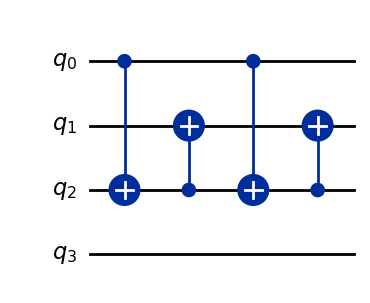

In [22]:
from QCCL.transformations import CNOTDecompositionTransformation

# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = CNOTDecompositionTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2st PATTERN: CNOT, CNOT, CNOT, CNOT -> CNOT or 4 CNOTs

Original Circuit:


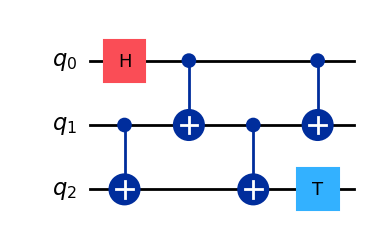

In [23]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.cx(1, 2)  
qc.cx(0, 1)  
qc.cx(1, 2)
qc.cx(0, 1) 
qc.t(2)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('c-t-c-t', <networkx.classes.digraph.DiGraph object at 0x00000192E30F6630>), ('cx', <networkx.classes.digraph.DiGraph object at 0x00000192E2F66750>), ('t-c-t-c', <networkx.classes.digraph.DiGraph object at 0x00000192CABE3F20>)]
Matching key and subgraph(dict): c-t-c-t, {'cx_1_control_1': 'cx_1_control_0', 'cx_2_target_1': 'cx_2_target_0', 'cx_1_target_2': 'cx_1_target_1', 'cx_0_control_2': 'cx_0_control_1', 'cx_1_control_3': 'cx_1_control_2', 'cx_2_target_3': 'cx_2_target_2', 'cx_0_control_4': 'cx_0_control_3', 'cx_1_target_4': 'cx_1_target_3'}
Matching subgraphs: DiGraph with 8 nodes and 13 edges
Matching key: c-t-c-t
Graph nodes: ['h_0_0', 'cx_1_control_1', 'cx_2_target_1', 'cx_0_control_2', 'cx_1_target_2', 'cx_1_control_3', 'cx_2_target_3', 'cx_0_control_4', 'cx_1_target_4', 't_2_5']
Transformed operations: [(Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 0),), ()), (Instruction(name='cx', num_qubits=2, num_clbits=

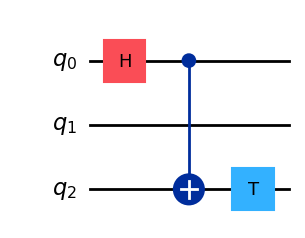

In [24]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = CNOTDecompositionTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test ChangeOfBasisTransformation

In [25]:
from qiskit.circuit.library import HGate, ZGate, XGate, TGate
import random
from QCCL.transformations import ChangeOfBasisTransformation

1st PATTERN: single H, Z, or X

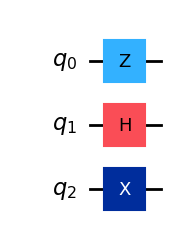

In [26]:
# Circuit with HZH pattern
qc = QuantumCircuit(3)
qc.z(0)
qc.h(1)
qc.x(2)

qc.draw('mpl')

Pattern subgraphs: [('z-h-x', <networkx.classes.digraph.DiGraph object at 0x00000192E30FC290>), ('x-h-z', <networkx.classes.digraph.DiGraph object at 0x00000192E325EB10>), ('h-z', <networkx.classes.digraph.DiGraph object at 0x00000192E32F72F0>), ('h-x', <networkx.classes.digraph.DiGraph object at 0x00000192E4635AC0>), ('z-h', <networkx.classes.digraph.DiGraph object at 0x00000192E35928A0>), ('x', <networkx.classes.digraph.DiGraph object at 0x00000192E3593C20>), ('z', <networkx.classes.digraph.DiGraph object at 0x00000192E45D0950>), ('h-x-h', <networkx.classes.digraph.DiGraph object at 0x00000192E30EABA0>), ('x-h', <networkx.classes.digraph.DiGraph object at 0x00000192E4635A00>), ('h', <networkx.classes.digraph.DiGraph object at 0x00000192E31F4980>), ('h-z-h', <networkx.classes.digraph.DiGraph object at 0x00000192E3033F50>)]
Matching key and subgraph(dict): x, {'x_2_2': 'x_0_0'}
Matching subgraphs: DiGraph with 1 nodes and 0 edges
Matching key: x
Replacement: [(Instruction(name='h', num

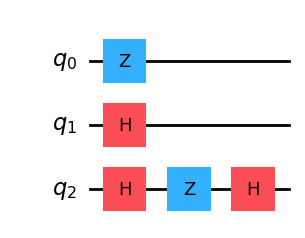

In [27]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ChangeOfBasisTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2nd PATTERN: HZ, ZH, HX, XH

Original Circuit:


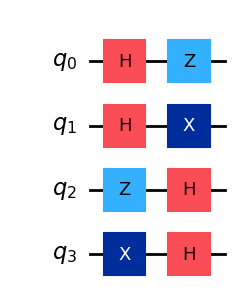

In [28]:
qc = QuantumCircuit(4)
qc.h(0)
qc.z(0)
qc.h(1)
qc.x(1)
qc.z(2)
qc.h(2)
qc.x(3)
qc.h(3)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('h-z', <networkx.classes.digraph.DiGraph object at 0x00000192E45D33E0>), ('h-x', <networkx.classes.digraph.DiGraph object at 0x00000192E4636030>), ('h-z-h', <networkx.classes.digraph.DiGraph object at 0x00000192E325EB10>), ('x-h-z', <networkx.classes.digraph.DiGraph object at 0x00000192E35B94F0>), ('h-x-h', <networkx.classes.digraph.DiGraph object at 0x00000192E33AAB10>), ('z-h-x', <networkx.classes.digraph.DiGraph object at 0x00000192E35928A0>), ('h', <networkx.classes.digraph.DiGraph object at 0x00000192E3592510>), ('z-h', <networkx.classes.digraph.DiGraph object at 0x00000192E46DC3E0>), ('z', <networkx.classes.digraph.DiGraph object at 0x00000192E4746600>), ('x', <networkx.classes.digraph.DiGraph object at 0x00000192E30A4E90>), ('x-h', <networkx.classes.digraph.DiGraph object at 0x00000192E46DDD90>)]
Matching key and subgraph(dict): h-z, {'h_0_0': 'h_0_0', 'z_0_1': 'z_0_1'}
Matching subgraphs: DiGraph with 2 nodes and 1 edges
Matching key: h-z
Replacement: [(Ins

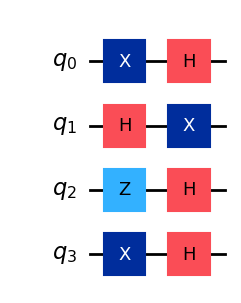

In [29]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ChangeOfBasisTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

3rd PATTERN: HXH, HZH, ...

Original Circuit:


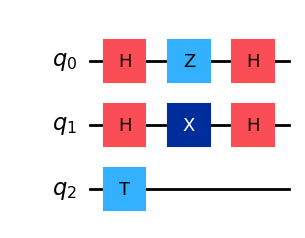

In [30]:
qc = QuantumCircuit(3)
qc.h(0)
qc.z(0)
qc.h(0)
qc.h(1)
qc.t(2)
qc.x(1)
qc.h(1)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('h', <networkx.classes.digraph.DiGraph object at 0x00000192E47B7470>), ('z-h-x', <networkx.classes.digraph.DiGraph object at 0x00000192E45D1AC0>), ('h-x-h', <networkx.classes.digraph.DiGraph object at 0x00000192E3345AF0>), ('x-h-z', <networkx.classes.digraph.DiGraph object at 0x00000192E30EABA0>), ('z-h', <networkx.classes.digraph.DiGraph object at 0x00000192E32A3110>), ('h-z', <networkx.classes.digraph.DiGraph object at 0x00000192E4747F80>), ('z', <networkx.classes.digraph.DiGraph object at 0x00000192E472E8A0>), ('x-h', <networkx.classes.digraph.DiGraph object at 0x00000192E35BA8A0>), ('x', <networkx.classes.digraph.DiGraph object at 0x00000192E46DF380>), ('h-z-h', <networkx.classes.digraph.DiGraph object at 0x00000192E4828A40>), ('h-x', <networkx.classes.digraph.DiGraph object at 0x00000192E3592AB0>)]
Matching key and subgraph(dict): h, {'h_1_3': 'h_0_0'}
Matching subgraphs: DiGraph with 1 nodes and 0 edges
Matching key: h
Replacement: [(Instruction(name='x', num

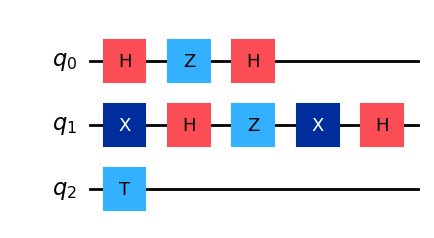

In [31]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ChangeOfBasisTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test ParallelXTransformation

1st PATTERN: parallel X

Original Circuit:


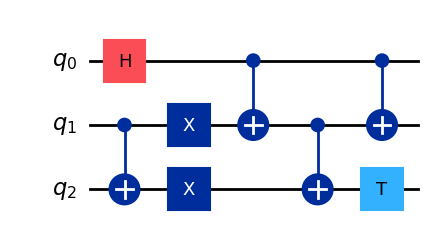

In [32]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.cx(1, 2)  
qc.x(1)
qc.x(2)
qc.cx(0, 1)  
qc.cx(1, 2)
qc.cx(0, 1) 
qc.t(2)

qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

In [33]:
gates = qc.data
qubits = set()

for gate in gates:
    qubits.update([qubit._index for qubit in gate.qubits])

len(qubits)

3

Pattern subgraphs: [('cx-x-cx', <networkx.classes.digraph.DiGraph object at 0x00000192E35631A0>)]
Pred_ctrl: cx_1_control_1, Succ_ctrl: cx_1_target_4, Pred_trgt: cx_2_target_1, Succ_trgt: cx_2_target_5
Pred_ctrl: x_1_add1, Succ_ctrl: cx_1_target_4, Pred_trgt: cx_2_target_add0, Succ_trgt: cx_2_target_5
Input nodes: ['h_0_0', 'cx_1_control_1', 'cx_2_target_1']
Added h gate to qubit 0
Frontier: {0: 'cx_0_control_4', 1: 'cx_1_control_1', 2: 'cx_2_target_1'}
Frontier: {0: 'cx_0_control_4'}
Frontier: {0: 'cx_0_control_4', 1: 'cx_1_control_add0', 2: 'cx_2_target_add0'}
Frontier: {0: 'cx_0_control_4'}
Added x gate to qubit 1
Frontier: {0: 'cx_0_control_4', 1: 'cx_1_control_add2', 2: 'cx_2_target_add2'}
Frontier: {0: 'cx_0_control_4'}
Frontier: {0: 'cx_0_control_4', 1: 'cx_1_target_4', 2: 'cx_2_target_5'}
Frontier: {0: 'cx_0_control_4', 1: 'cx_1_target_4'}
Frontier: {0: 'cx_0_control_6', 1: 'cx_1_control_5', 2: 'cx_2_target_5'}
Frontier: {0: 'cx_0_control_6'}
Added t gate to qubit 2
Frontier: {

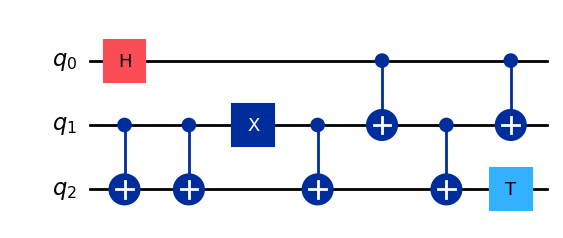

In [34]:
from QCCL.transformations import ParallelXTransformation

# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ParallelXTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2nd PATTERN: cx-x-cx

Original Circuit:


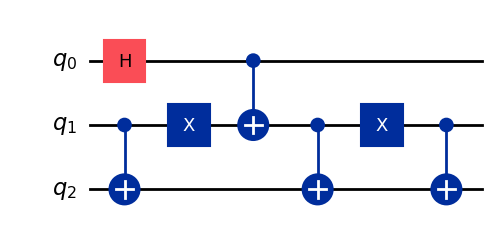

In [35]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.cx(1, 2)  
qc.x(1)
qc.cx(0, 1)  
qc.cx(1, 2)
qc.x(1)
qc.cx(1, 2)

qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('cx-x-cx', <networkx.classes.digraph.DiGraph object at 0x00000192E49DA570>)]
Matching key and subgraph(dict): cx-x-cx, {'cx_1_control_4': 'cx_0_control_0', 'cx_2_target_4': 'cx_1_target_0', 'x_1_5': 'x_0_1', 'cx_1_control_6': 'cx_0_control_2', 'cx_2_target_6': 'cx_1_target_2'}
Matching subgraphs: DiGraph with 5 nodes and 7 edges
Matching key: cx-x-cx
Graph nodes: ['h_0_0', 'cx_1_control_1', 'cx_2_target_1', 'x_1_2', 'cx_0_control_3', 'cx_1_target_3', 'cx_1_control_4', 'cx_2_target_4', 'x_1_5', 'cx_1_control_6', 'cx_2_target_6']

Transformed Circuit:


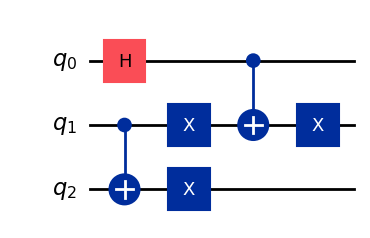

In [36]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ParallelXTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

TEST: no match

Original Circuit:


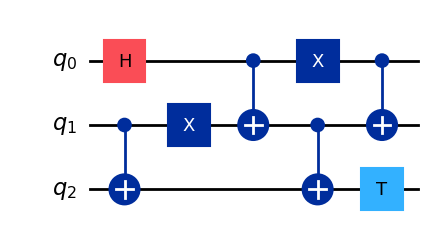

In [37]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.cx(1, 2)  
qc.x(1)
qc.cx(0, 1) 
qc.x(0) 
qc.cx(1, 2)
qc.cx(0, 1) 
qc.t(2)

qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

In [38]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ParallelXTransformation(qcg)

try:
    # Apply the transformation
    transformed_qcg = transformation.apply()  # Applying the transformation
    transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

    # Display the transformed circuit
    print("\nTransformed Circuit:")
    transformed_circuit.draw(output='mpl')

except Exception as e:
    print("Transformation failed with error:", e)

Pattern subgraphs: [('cx-x-cx', <networkx.classes.digraph.DiGraph object at 0x00000192E32A26C0>)]
Transformation failed with error: No matching subgraphs found for the given pattern.


### Test ParallelZTransformation

1st PATTERN: parallel Z

Original Circuit:


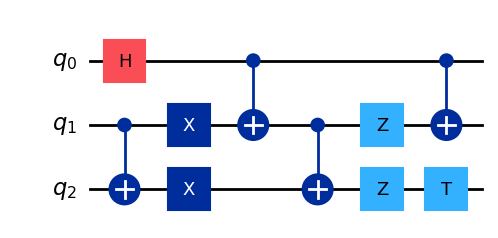

In [39]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.cx(1, 2)  
qc.x(1)
qc.x(2)
qc.cx(0, 1)  
qc.cx(1, 2)
qc.z(1)
qc.cx(0, 1) 
qc.z(2)
qc.t(2)

qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('cx-z-cx', <networkx.classes.digraph.DiGraph object at 0x00000192E4C1BE30>)]
Matching subgraph: DiGraph with 2 nodes and 0 edges
Matching key: parallel-z
Graph nodes: ['h_0_0', 'cx_1_control_1', 'cx_2_target_1', 'x_1_2', 'x_2_3', 'cx_0_control_4', 'cx_1_target_4', 'cx_1_control_5', 'cx_2_target_5', 'z_1_6', 'cx_0_control_7', 'cx_1_target_7', 'z_2_8', 't_2_9']
Pred_ctrl: cx_1_control_5, Succ_ctrl: cx_1_target_7, Pred_trgt: cx_2_target_5, Succ_trgt: t_2_9
Pred_ctrl: cx_1_control_add0, Succ_ctrl: cx_1_target_7, Pred_trgt: z_2_add1, Succ_trgt: t_2_9
Input nodes: ['h_0_0', 'cx_1_control_1', 'cx_2_target_1']
Added h gate to qubit 0
Frontier: {0: 'cx_0_control_4', 1: 'cx_1_control_1', 2: 'cx_2_target_1'}
Frontier: {0: 'cx_0_control_4'}
Added x gate to qubit 1
Added x gate to qubit 2
Frontier: {0: 'cx_0_control_4', 1: 'cx_1_target_4', 2: 'cx_2_target_5'}
Frontier: {0: 'cx_0_control_4', 1: 'cx_1_target_4'}
Frontier: {0: 'cx_0_control_7', 1: 'cx_1_control_5', 2: 'cx_2_target

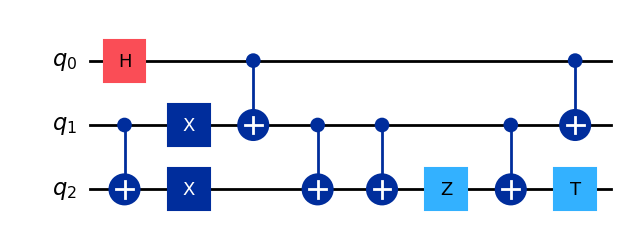

In [40]:
from QCCL.transformations import ParallelZTransformation

# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ParallelZTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2nd PATTERN: cx-z-cx

Original Circuit:


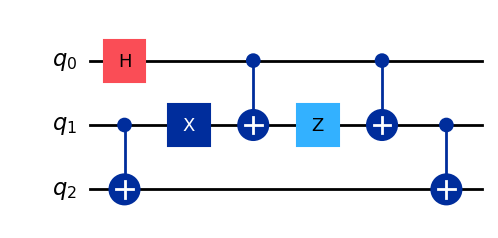

In [41]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.cx(1, 2)  
qc.x(1)
qc.cx(0, 1)  
qc.z(1)
qc.cx(0, 1)  
qc.cx(1, 2)


qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('cx-z-cx', <networkx.classes.digraph.DiGraph object at 0x00000192E346A8A0>)]
Matching key and subgraph(dict): cx-z-cx, {'cx_0_control_3': 'cx_0_control_0', 'cx_1_target_3': 'cx_1_target_0', 'z_1_4': 'z_1_1', 'cx_0_control_5': 'cx_0_control_2', 'cx_1_target_5': 'cx_1_target_2'}
Matching subgraphs: DiGraph with 5 nodes and 7 edges
Matching key: cx-z-cx
Matching subgraph: DiGraph with 5 nodes and 7 edges
Matching key: cx-z-cx
Graph nodes: ['h_0_0', 'cx_1_control_1', 'cx_2_target_1', 'x_1_2', 'cx_0_control_3', 'cx_1_target_3', 'z_1_4', 'cx_0_control_5', 'cx_1_target_5', 'cx_1_control_6', 'cx_2_target_6']

Transformed Circuit:


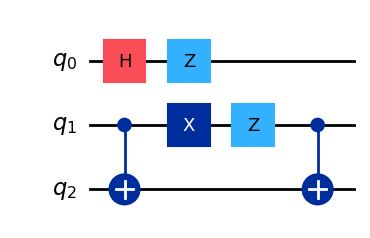

In [42]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ParallelZTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

Parallel Z at the start/end

Original Circuit:


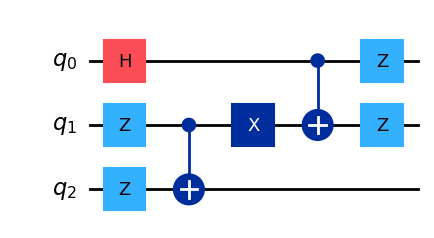

In [43]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.z(1)
qc.z(2)
qc.cx(1, 2)  
qc.x(1)
qc.cx(0, 1)  
qc.z(1)
qc.z(0)


qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('cx-z-cx', <networkx.classes.digraph.DiGraph object at 0x00000192E346A8A0>)]
Matching subgraph: DiGraph with 2 nodes and 0 edges
Matching key: parallel-z
Graph nodes: ['h_0_0', 'z_1_1', 'z_2_2', 'cx_1_control_3', 'cx_2_target_3', 'x_1_4', 'cx_0_control_5', 'cx_1_target_5', 'z_1_6', 'z_0_7']
Pred_ctrl: cx_0_control_5, Succ_ctrl: None, Pred_trgt: cx_1_target_5, Succ_trgt: None
Pred_ctrl: cx_0_control_add0, Succ_ctrl: None, Pred_trgt: z_1_add1, Succ_trgt: None
Input nodes: ['h_0_0', 'z_1_1', 'z_2_2']
Added h gate to qubit 0
Added z gate to qubit 1
Added z gate to qubit 2
Frontier: {0: 'cx_0_control_5', 1: 'cx_1_control_3', 2: 'cx_2_target_3'}
Frontier: {0: 'cx_0_control_5'}
Added x gate to qubit 1
Frontier: {0: 'cx_0_control_5', 1: 'cx_1_target_5', 2: None}
Frontier: {0: 'cx_0_control_5', 1: 'cx_1_target_5'}
Frontier: {0: 'cx_0_control_add0', 1: 'cx_1_target_add0', 2: None}
Frontier: {0: 'cx_0_control_add0', 1: 'cx_1_target_add0'}
Added z gate to qubit 1
Frontier: {0:

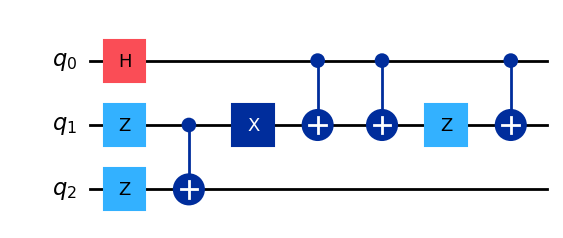

In [44]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ParallelZTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test CommuteCNOTRotationTransformation

Original Circuit:


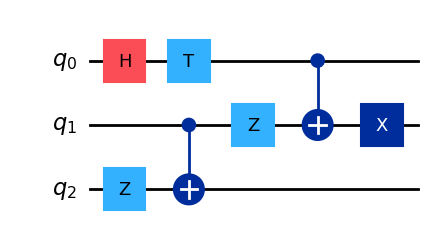

In [45]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.t(0)
qc.z(2)
qc.cx(1, 2)  
qc.z(1)
qc.cx(0, 1)  
qc.x(1)



qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('cx-z-control', <networkx.classes.digraph.DiGraph object at 0x00000192E4FA2C60>), ('t-cx-control', <networkx.classes.digraph.DiGraph object at 0x00000192E4E75430>), ('z-cx-control', <networkx.classes.digraph.DiGraph object at 0x00000192E4E74740>), ('cx-x-target', <networkx.classes.digraph.DiGraph object at 0x00000192E4B368A0>), ('cx-t-control', <networkx.classes.digraph.DiGraph object at 0x00000192E318A6C0>), ('x-cx-target', <networkx.classes.digraph.DiGraph object at 0x00000192E4B37290>)]
Matching key and subgraph(dict): cx-z-control, {'cx_1_control_3': 'cx_0_control_0', 'cx_2_target_3': 'cx_1_target_0', 'z_1_4': 'z_0_1'}
Matching subgraphs: DiGraph with 3 nodes and 3 edges
Matching key: cx-z-control
Node z_1_4: qubit=1, predecessors=[], successors=cx_1_target_5
Node cx_1_control_3: qubit=1, predecessors=None, successors=cx_1_target_5
Node cx_2_target_3: qubit=2, predecessors=z_2_2, successors=None
Common qubit 1: predecessors=None, successors=cx_1_target_5
Input 

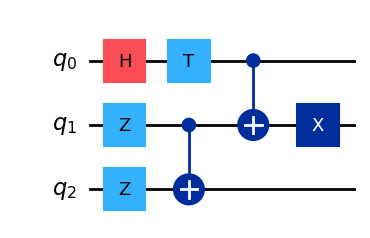

In [46]:
from QCCL.transformations import CommuteCNOTRotationTransformation

# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = CommuteCNOTRotationTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test CommuteCNOTsTransformation

Original Circuit:


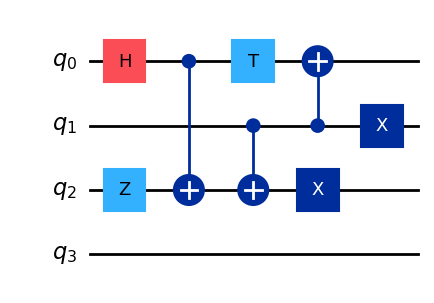

In [47]:
qc = QuantumCircuit(4)
 
qc.h(0)
qc.z(2)
qc.cx(0,2)
qc.t(0)
qc.cx(1, 2)  

qc.cx(1, 0)  
qc.x(1)
qc.x(2)


qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('control', <networkx.classes.digraph.DiGraph object at 0x00000192E35B9880>), ('target', <networkx.classes.digraph.DiGraph object at 0x00000192E4CF0500>)]
Matching key and subgraph(dict): control, {'cx_1_control_4': 'cx_0_control_0', 'cx_2_target_4': 'cx_1_target_0', 'cx_1_control_5': 'cx_0_control_1', 'cx_0_target_5': 'cx_2_target_1'}
Matching subgraphs: DiGraph with 4 nodes and 5 edges
Matching key: control
Node cx_1_control_4: qubit=1, predecessors=None, successors=[]
Node cx_1_control_5: qubit=1, predecessors=None, successors=x_1_6
Node cx_2_target_4: qubit=2, predecessors=cx_2_target_2, successors=x_2_7
Node cx_0_target_5: qubit=0, predecessors=t_0_3, successors=None
Common qubit 1: predecessors=None, successors=x_1_6
Input nodes: ['h_0_0', 'cx_1_control_5', 'z_2_1']
Added h gate to qubit 0
Added z gate to qubit 2
Frontier: {0: 'cx_0_control_2', 1: 'cx_1_control_5', 2: 'cx_2_target_2'}
Frontier: {1: 'cx_1_control_5'}
Added t gate to qubit 0
Frontier: {0: 'cx_0_

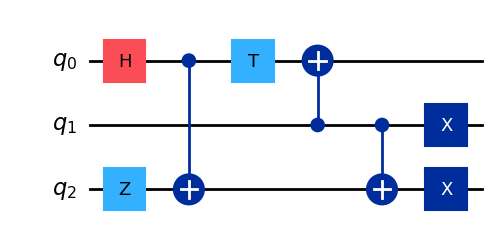

In [48]:
from QCCL.transformations import CommuteCNOTsTransformation

# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = CommuteCNOTsTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

In [49]:
gates = qc.data
qubits = set()

for gate in gates:
    qubits.update([qubit._index for qubit in gate.qubits])

len(qubits)

3

### Test SwapCNOTsTransformation

Original Circuit:


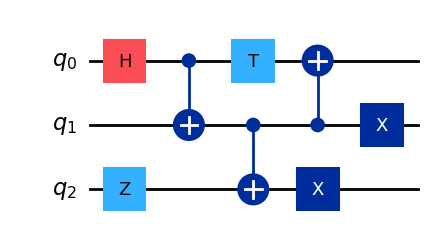

In [62]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.z(2)
qc.cx(0,1)
qc.t(0)
qc.cx(1, 2)  

qc.cx(1, 0)  
qc.x(1)
qc.x(2)


qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('c-t-cx', <networkx.classes.digraph.DiGraph object at 0x00000192E63D79B0>), ('t-c-cx', <networkx.classes.digraph.DiGraph object at 0x00000192E4F78B60>), ('t-c', <networkx.classes.digraph.DiGraph object at 0x00000192E4FEE840>), ('c-t', <networkx.classes.digraph.DiGraph object at 0x00000192E5085850>), ('cx-c-t', <networkx.classes.digraph.DiGraph object at 0x00000192E4FEE810>), ('cx-t-c', <networkx.classes.digraph.DiGraph object at 0x00000192E4EF4920>)]
Matching key and subgraph(dict): c-t, {'cx_0_control_2': 'cx_0_control_0', 'cx_1_target_2': 'cx_1_target_0', 'cx_1_control_4': 'cx_1_control_1', 'cx_2_target_4': 'cx_2_target_1'}
Matching subgraphs: [<networkx.classes.digraph.DiGraph object at 0x00000192E61B2DB0>]
Matching key: ['c-t']
Node cx_1_control_4: qubit=1, predecessors=[], successors=cx_1_control_5
Node cx_1_target_2: qubit=1, predecessors=None, successors=cx_1_control_5
Node cx_2_target_4: qubit=2, predecessors=z_2_1, successors=x_2_7
Node cx_0_control_2: qub

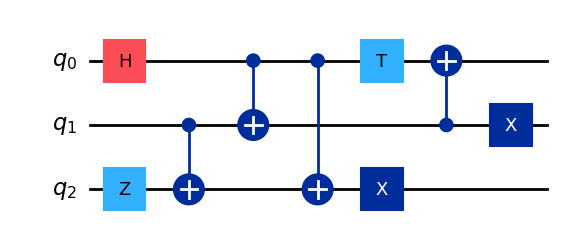

In [63]:
from QCCL.transformations import SwapCNOTsTransformation

# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = SwapCNOTsTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

Pattern subgraphs: [('c-t-cx', <networkx.classes.digraph.DiGraph object at 0x00000192E6513080>), ('t-c', <networkx.classes.digraph.DiGraph object at 0x00000192E6401970>), ('t-c-cx', <networkx.classes.digraph.DiGraph object at 0x00000192E6121970>), ('cx-t-c', <networkx.classes.digraph.DiGraph object at 0x00000192E4FED010>), ('c-t', <networkx.classes.digraph.DiGraph object at 0x00000192E4EC7AA0>), ('cx-c-t', <networkx.classes.digraph.DiGraph object at 0x00000192E6395C70>)]
Matching key and subgraph(dict): t-c, {'cx_1_control_2': 'cx_1_control_0', 'cx_2_target_2': 'cx_0_target_0', 'cx_1_target_3': 'cx_1_target_1', 'cx_0_control_3': 'cx_2_control_1'}
Matching key and subgraph(dict): t-c-cx, {'cx_1_control_2': 'cx_1_control_0', 'cx_2_target_2': 'cx_0_target_0', 'cx_1_target_3': 'cx_1_target_1', 'cx_0_control_3': 'cx_2_control_1', 'cx_0_control_4': 'cx_2_control_2', 'cx_2_target_4': 'cx_0_target_2'}
Matching key and subgraph(dict): c-t, {'cx_0_control_3': 'cx_0_control_0', 'cx_1_target_3': '

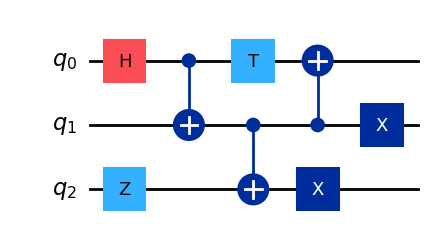

In [64]:
# reverse transformation

qc = transformed_circuit

# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = SwapCNOTsTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

In [65]:
import numpy as np

def get_qubit(node_label):
    return int(node_label.split('_')[1])

graph_nodes = ['cx_0_control_5', 'cx_2_target_3', 'cx_2_target_2', 'cx_0_control_2', 'cx_1_control_3', 'cx_1_target_5']

qubit_role = ['_'.join(node.split('_')[1:3]) for node in graph_nodes]  
# get index in the original list of qubit_role which has count equal to 2
indices_with_count_2 = [i for i, q_role in enumerate(qubit_role) if np.count_nonzero(np.array(qubit_role) == q_role) == 2]
cnot_nodes = [list(graph_nodes)[i] for i in indices_with_count_2]
print(f"CNOT nodes: {cnot_nodes}")

# For these indices, get unique gate identifiers and extract indices corresponding to a count equal to 2
qubits = [node.split('_')[-1] for node in cnot_nodes]
unique_ids, counts = np.unique(qubits, return_counts=True)

# Identify identifiers that appear exactly twice
qubits_with_count_2 = unique_ids[counts == 2]

# Filter cnot_nodes to include only those with identifier that appear twice
cnot_nodes = [node for node in cnot_nodes if node.split('_')[-1] in qubits_with_count_2]

print(f"CNOT nodes after filtering: {cnot_nodes}")

CNOT nodes: ['cx_0_control_5', 'cx_2_target_3', 'cx_2_target_2', 'cx_0_control_2']
CNOT nodes after filtering: ['cx_2_target_2', 'cx_0_control_2']
